# Classification model using Random Forest

### 1. Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [19]:
path ="../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_bin.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,428,429,430,431,432,433,434,435,436,437
0,1,-0.017791,-0.245300,0.463568,-0.517827,-0.355514,0.487726,0.482991,-0.339176,0.662390,...,-0.625847,0.461229,-0.598586,0.767162,0.414474,0.245944,-0.989470,-0.252575,0.261593,0.291109
1,0,0.110768,0.574821,0.105035,-0.470658,-1.425475,0.535306,0.419043,0.163311,0.275816,...,-0.661165,-0.380656,0.244910,0.683573,-0.592842,0.038613,0.628091,-0.130931,-0.041118,-0.899655
2,1,0.001459,0.880947,-0.013048,-0.862418,-1.298104,0.784262,-0.053569,-0.193600,0.001717,...,-0.642589,-0.474344,0.428170,0.699182,-0.055734,0.590347,0.470508,-0.353349,-0.053301,-0.224115
3,0,0.062937,0.368952,-0.551430,0.313969,0.537392,-0.051345,-0.128191,-0.052663,0.022732,...,0.170213,-0.524737,0.457968,-0.350422,-0.153530,0.009347,-0.301081,-0.300408,0.130717,-0.096597
4,1,0.207857,0.284800,0.107111,-0.556411,-1.325310,0.267002,0.502943,-0.133496,0.225408,...,-0.396248,-0.215058,-0.150988,0.429753,-0.210586,0.285608,0.605913,-0.250192,0.251523,-0.497216


In [20]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.017791 -0.245300  0.463568 -0.517827 -0.355514  0.487726  0.482991   
1    0.110768  0.574821  0.105035 -0.470658 -1.425475  0.535306  0.419043   
2    0.001459  0.880947 -0.013048 -0.862418 -1.298104  0.784262 -0.053569   
3    0.062937  0.368952 -0.551430  0.313969  0.537392 -0.051345 -0.128191   
4    0.207857  0.284800  0.107111 -0.556411 -1.325310  0.267002  0.502943   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.097058  0.170209  0.076273 -0.483340 -0.977704  0.420521  0.228634   
177 -0.155079 -0.147931 -0.948970 -0.418657  0.217772 -0.511356 -0.288000   
178 -0.281101  0.346973  0.178181 -0.358279 -0.779175  0.444296 -0.073569   
179  0.006101  0.110437  0.175757 -0.590025 -0.952412  0.304226  0.129646   
180  0.413711  0.760893  0.515536 -0.342198 -0.715016  0.434291 -0.205907   

            7         8         9  ...       428       429       430  \
0  

### 3. Train-Test dataset split

In [21]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [22]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [23]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(min_samples_leaf=3, n_estimators=10, random_state=125)


In [24]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.6463054187192119


### 5. Prediction

In [25]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [26]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [27]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9444444444444444
Final accuracy on the testing dataset: 0.43243243243243246


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  3]
 [ 5 71]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1]


In [29]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.96      0.93      0.95        76

    accuracy                           0.94       144
   macro avg       0.94      0.95      0.94       144
weighted avg       0.94      0.94      0.94       144



In [30]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7 10]
 [11  9]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1]


In [31]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.47      0.45      0.46        20

    accuracy                           0.43        37
   macro avg       0.43      0.43      0.43        37
weighted avg       0.43      0.43      0.43        37



Features with relevance over 0:  125
Features with relevance over 0.05:  0


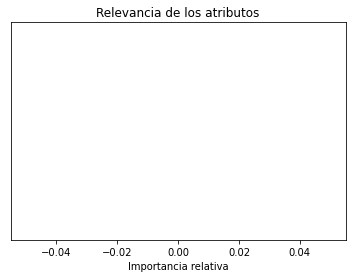

0 = 0.0
1 = 0.0010411876480438697
2 = 0.0
3 = 0.0
4 = 0.0
5 = 0.0
6 = 0.0
7 = 0.0
8 = 0.0
9 = 0.0
10 = 0.0
11 = 0.001840569728985189
12 = 0.0
13 = 0.0
14 = 0.006355286023335816
15 = 0.0
16 = 0.0
17 = 0.003160410165341049
18 = 0.0
19 = 0.0
20 = 0.0
21 = 0.0
22 = 0.0
23 = 0.0
24 = 0.0
25 = 0.0008900123360553392
26 = 0.0
27 = 0.0026303554910108787
28 = 0.0
29 = 0.010896189774807075
30 = 0.0
31 = 0.009914559285759066
32 = 0.0
33 = 0.012790296454934588
34 = 0.0
35 = 0.0
36 = 0.0
37 = 0.006103898709793931
38 = 0.022736587149845406
39 = 0.0
40 = 0.0023947315905008975
41 = 0.0
42 = 0.0
43 = 0.016559109203118462
44 = 0.0
45 = 0.0
46 = 0.0
47 = 0.0
48 = 0.0034149314372778064
49 = 0.0
50 = 0.0
51 = 0.0
52 = 0.01181877452923053
53 = 0.0
54 = 0.0
55 = 0.0
56 = 0.0021552584314508067
57 = 0.0
58 = 0.0
59 = 0.015056417021725091
60 = 0.0
61 = 0.0
62 = 0.0
63 = 0.0010570824524312873
64 = 0.0
65 = 0.003740020370630122
66 = 0.0
67 = 0.0
68 = 0.008379888268156423
69 = 0.006455836725399218
70 = 0.0
71 = 0.0

In [32]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.